# Task 1 - INM702 Coursework

## Content:
- **[Part 1](#part1)- Heuristic approach**
- [Part 1.1](#part1.1)- Visualisation of heuristic approach
- **[Part 2](#part2)- Dijkstra's algorithm implementation on heuristic approach with 2 modes of the game**
- [Part 2.1](#part2.1)- Visualisation of implementation of Dijkstra's algorithm

[Back to top](#Content:)


<a id='part1'></a>
## Heuristic algorithm

In [1]:
#Build a method to build and visualize the grid filled with random numbers.
import random
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
HEIGHT = int(input("Insert amount of rows in the grid: "))
WIDTH = int(input("Insert amount of columns in the grid: "))
game_mode = int(input("Choose mode of the game:\n1 - The time spent on a cell is the number on this cell; \n2 - The time spent on a cell - absolute of the difference between the previous and current cell.\nYour answer:  "))

Insert amount of rows in the grid: 40
Insert amount of columns in the grid: 40
Choose mode of the game:
1 - The time spent on a cell is the number on this cell; 
2 - The time spent on a cell - absolute of the difference between the previous and current cell.
Your answer:  2


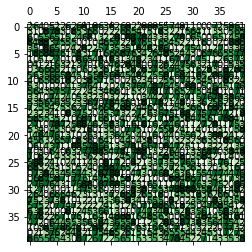

In [3]:
#initialising the grid of our game and visualising it 
ARRAY = np.random.randint(0,9, (HEIGHT, WIDTH))

fig = plt.figure()
ax = fig.add_subplot(111)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(ARRAY, cmap = plt.cm.Greens)
plt.show()

In [4]:
#finding neihbour in the grid for each cell
#agent moves from cell to cell (down and right in the heuristic approach)
def f_neighbours(array, i, j):
    neighbours_k = []
    neighbours_v = []
    while True:
        if i >= HEIGHT or j >= WIDTH:
            False
            
        #neighbors search goes cloclwise:
        elif i == 0 or i == (HEIGHT-1) or j == 0 or j == (WIDTH - 1):    # corners and sides
            
            if j != (WIDTH - 1):             
                neighbours_k.append(array[i, j+1])
                neighbours_v.append((i, j+1))#r
                
            if i != (HEIGHT-1):
                neighbours_k.append(array[i+1,j])
                neighbours_v.append((i+1, j))#d
                

        elif i < HEIGHT and j < WIDTH:
            neighbours_k = [array[i, j + 1], array[i + 1, j]]  
            neighbours_v = [(i,j + 1), (i + 1,j)]  
        return neighbours_k, neighbours_v


In [5]:
# 2 MODES OF THE GAME  
def f_cell (ks):
    min_val=min(ks)
    return min_val

def f_distance (ks, next_cell):
    distance = []
    for i in range(len(ks)):
        n = ks[i] # each neighbour
        d = abs(n - next_cell) #distance between neighbour and current cell
        distance.append(d)
    small_d = min(distance)
    index_position = distance.index(small_d)
    next_cell = ks[index_position]
    return small_d, next_cell 

In [6]:
#finds key value index in the list "ks", so that that index position can be used to get the (i,j) location in the "vs" list
def f_location (ks, a):
    location = ks.index(a)
    return location

In [7]:
# find the row i position
def first(vs, idex_pos):
    location = vs[idex_pos]
    i = location[0]
    return i


In [8]:
# find the column j position
def second (vs, idex_pos):
    location = vs[idex_pos]
    j = location[1]
    return j

In [9]:
# test game
game_is_on = True

score_mode1 = []
score_mode2 = []

next_cell = ARRAY[0, 0]
score_mode1.append(next_cell)
neighbours = {next_cell: (0, 0)}

prev_cell = ARRAY[0, 0]
prev_l = [(0, 0)]

i=0
j=0

In [10]:
while game_is_on:
    if game_mode == 1:    

        neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
        ks= neighbours[0] # list , which keeps record of the key value of the neighbour - its weight
        vs = neighbours[1] # list , which keeps record of the value (location) of the neighbour - (i,j)

        # if final destination is the neighbour, go straight to that cell (HEIGHT-1, WIDTH-1)
        if (HEIGHT-1, WIDTH-1) in vs:
            score_mode1.append(ARRAY[HEIGHT-1, WIDTH-1])
            prev_l.append([HEIGHT-1, WIDTH-1])
            game_is_on = False

        else:
            next_cell = f_cell(ks) #finding the minimum value cell
            index_pos = f_location(ks, next_cell)

            #if the smallest one  - the previous one, chose the other smallest
            if vs[index_pos] in prev_l:
                ks.remove(next_cell)
                del(vs[index_pos])
                next_cell = f_cell(ks)
                index_pos = f_location(ks, next_cell)


            score_mode1.append(next_cell)

            prev_cell=next_cell
            prev_l.append(vs[index_pos])

            i = first(vs, index_pos)
            j = second(vs, index_pos)
            
    if game_mode == 2:
        
        neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
        ks= neighbours[0] # list , which keeps record of the key value of the neighbour - its weight
        vs = neighbours[1] # list , which keeps record of the value (location) of the neighbour - (i,j)

        # if final destination is the neighbour, go straight to that cell (HEIGHT-1, WIDTH-1)
        if (HEIGHT-1, WIDTH-1) in vs:
            distance = abs(ARRAY[HEIGHT-1, WIDTH-1] - prev_cell)
            score_mode2.append(distance)
            prev_l.append([HEIGHT-1, WIDTH-1])
            game_is_on = False
            
        else:    
            small_d, next_cell  = f_distance (ks, next_cell) # finds smallest distance
            index_pos = f_location(ks, next_cell)
            
            #if the smallest one  - the previous one, chose the other smallest
            if vs[index_pos] in prev_l:
                ks.remove(next_cell)
                del(vs[index_pos])
                small_d, next_cell  = f_distance (ks, next_cell) # finds smallest distance
                index_pos = f_location(ks, next_cell)

            score_mode2.append(small_d)
            prev_cell=next_cell
            prev_l.append(vs[index_pos])

            i = first(vs, index_pos)
            j = second(vs, index_pos)

In [11]:
if game_mode == 1:
    total_1 = sum(score_mode1)  #sum of the score
    print(score_mode1)
    print (f"End of the game. Your final score for mode 1 is {total_1}")
else:
    total_2 = sum(score_mode2)  #sum of the score
    print(score_mode2)
    print (f"End of the game. Your final score for mode 2 is {total_2}")

[1, 2, 1, 5, 0, 1, 1, 2, 2, 0, 0, 1, 1, 3, 0, 2, 1, 1, 3, 2, 0, 3, 1, 1, 1, 5, 0, 2, 1, 2, 0, 0, 1, 1, 3, 0, 2, 0, 3, 2, 5, 4, 3, 0, 1, 0, 4, 3, 1, 0, 2, 1, 1, 3, 2, 3, 4, 1, 1, 2, 3, 0, 1, 0, 3, 1, 0, 0, 4, 2, 8, 6, 0, 1, 1, 0, 1, 5]
End of the game. Your final score for mode 2 is 134


[Back to top](#Content:)


<a id='part1.1'></a>
## Visualisation of heuristic approach

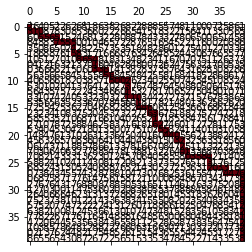

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

colored_path = np.zeros((HEIGHT,WIDTH), dtype=int)

for list in prev_l:
    r= list[0]
    c = list[1]
    colored_path[r,c] = 1
# print(colored_path)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(colored_path, cmap = plt.cm.Reds)
plt.show()

[Back to top](#Content:)


<a id='part2'></a>
## Dijkstra's algorithm implementation on heuristic approach with 2 modes of the game
Implementation of heuristic approach for Dijkstra's algorithm to find the shortest path

In [13]:
HEIGHT = int(input("Insert amount of rows in the grid: "))
WIDTH = int(input("Insert amount of columns in the grid: "))
game_mode = int(input("Choose mode of the game:\n1 - The time spent on a cell is the number on this cell; \n2 - The time spent on a cell - absolute of the difference between the previous and current cell.\nYour answer:  "))

Insert amount of rows in the grid: 40
Insert amount of columns in the grid: 40
Choose mode of the game:
1 - The time spent on a cell is the number on this cell; 
2 - The time spent on a cell - absolute of the difference between the previous and current cell.
Your answer:  2


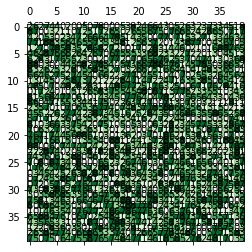

In [14]:
#initialising the grid of our game and visualising it 
ARRAY = np.random.randint(0,9, (HEIGHT, WIDTH))

fig = plt.figure()
ax = fig.add_subplot(111)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(ARRAY, cmap = plt.cm.Greens)
plt.show()

In [15]:
#finding neihbour in the grid for each cell
#agent moves from cell to cell (u,d,l,r)
def f_neighbours(array, i, j):
    neighbours_k = []
    neighbours_v = []
    while True:
        if i >= HEIGHT or j >= WIDTH:
            False
            
        #neighbors search goes cloclwise:
        elif i == 0 or i == (HEIGHT-1) or j == 0 or j == (WIDTH - 1):    # corners and sides
            
            if i != 0:
                neighbours_k.append(array[i - 1, j])
                neighbours_v.append((i - 1,j)) # u
                
            if j != (WIDTH - 1):             
                neighbours_k.append(array[i, j+1])
                neighbours_v.append((i, j+1))#r
                
            if i != (HEIGHT-1):
                neighbours_k.append(array[i+1,j])
                neighbours_v.append((i+1, j))#d
                

        elif i < HEIGHT and j < WIDTH:
            neighbours_k = [array[i - 1, j], array[i, j + 1], array[i + 1, j]]  
            neighbours_v = [(i - 1,j), (i,j + 1), (i + 1,j)]  
        return neighbours_k, neighbours_v


In [16]:
# 2 MODES OF THE GAME  
def f_cell (ks):
    min_val=min(ks)
    return min_val

def f_distance (ks, next_cell):
    distance = []
    for i in range(len(ks)):
        n = ks[i] # each neighbour
        d = abs(n - next_cell) #distance between neighbour and current cell
        distance.append(d)
    small_d = min(distance)
    index_position = distance.index(small_d)
    next_cell = ks[index_position]
    return small_d, next_cell 


In [17]:
#finds key value index in the list "ks", so that that index position can be used to get the (i,j) location in the "vs" list
def f_location (ks, a):
    location = ks.index(a)
    return location

In [18]:
# find the row i position
def first(vs, idex_pos):
    location = vs[idex_pos]
#     print(location)
    i = location[0]
    return i

In [19]:
# find the column j position
def second (vs, idex_pos):
    location = vs[idex_pos]
    j = location[1]
    return j

In [20]:
# test game
game_is_on = True

score_mode1 = []
score_mode2 = []

next_cell = ARRAY[0, 0] # next cell to go

score_mode1.append(next_cell)
neighbours = {next_cell: (0, 0)}

prev_cell = ARRAY[0, 0] # previously visited cell
prev_l = [(0, 0)] # list of visited cells

i=0
j=0

In [21]:
while game_is_on:
    
    if game_mode == 1:

        neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
        ks= neighbours[0] #key values - the "weight"
        vs = neighbours[1] # values - the location(i,j)

        #if next_cell is our destination cell then the program stops
        if (HEIGHT-1, WIDTH-1) in vs:
            score_mode1.append(ARRAY[HEIGHT-1, WIDTH-1])
            prev_l.append([HEIGHT-1, WIDTH-1])
            game_is_on = False

        else:
            next_cell = f_cell(ks) #finding the minimum value cell
            index_pos = f_location(ks, next_cell)


            #if the smallest one  - the previous one, chose the other smallest
            for _ in range (len(neighbours)): # number of neighbours need to be tested for the "visited" status
                if vs[index_pos] in prev_l:
                    ks.remove(next_cell)
                    del(vs[index_pos])
                    next_cell = f_cell(ks) #finding the minimum value cell
                    index_pos = f_location(ks, next_cell)

            #if the smallest one - on the side
            if (vs[index_pos][0] == 0 and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (WIDTH-1) and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == HEIGHT-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == 0):
                ks.remove(next_cell)
                del(vs[index_pos])
                next_cell = f_cell(ks) #finding the minimum value cell
                index_pos = f_location(ks, next_cell)


            score_mode1.append(next_cell)
            prev_cell=next_cell
            prev_l.append(vs[index_pos])

            i = first(vs, index_pos)
            j = second(vs, index_pos)
           

            
    if game_mode == 2:
        
        neighbours = f_neighbours(ARRAY, i, j) #finds all neighbours
        ks= neighbours[0] #key values - the "weight"
        vs = neighbours[1] # values - the location(i,j)

        #if next_cell is our destination cell then the program stops
        if (HEIGHT-1, WIDTH-1) in vs:
            distance = abs(ARRAY[HEIGHT-1, WIDTH-1] - prev_cell)
            score_mode2.append(distance)
            prev_l.append([HEIGHT-1, WIDTH-1])
            game_is_on = False

        else:
            small_d, next_cell  = f_distance (ks, next_cell) # finds smallest distance
            index_pos = f_location(ks, next_cell)
            
            #if the smallest one  - the previous one, chose the other smallest
            for _ in range (len(neighbours)): # number of neighbours need to be tested for the "visited" status
                if vs[index_pos] in prev_l:
                    ks.remove(next_cell)
                    del(vs[index_pos])
                    small_d, next_cell  = f_distance (ks, next_cell) # finds smallest distance
                    index_pos = f_location(ks, next_cell)

         
            if (vs[index_pos][0] == 0 and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (WIDTH-1) and vs[index_pos][1] == j-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == HEIGHT-1) or (vs[index_pos][0] == (i-1) and vs[index_pos][1] == 0):
                ks.remove(next_cell)
                del(vs[index_pos])
                small_d, next_cell  = f_distance (ks, next_cell) # finds smallest distance
                index_pos = f_location(ks, next_cell)


            score_mode2.append(small_d)
            prev_cell=next_cell
            prev_l.append(vs[index_pos])

            i = first(vs, index_pos)
            j = second(vs, index_pos)
          

In [22]:
if game_mode == 1:
    total_1 = sum(score_mode1)  #sum of the score
    print(score_mode1)
    print (f"End of the game. Your final score for mode 1 is {total_1}")
else:
    total_2 = sum(score_mode2)  #sum of the score
    print(score_mode2)
    print (f"End of the game. Your final score for mode 2 is {total_2}")

[4, 1, 4, 2, 0, 0, 3, 0, 3, 2, 1, 0, 1, 1, 0, 5, 3, 0, 3, 0, 1, 0, 0, 1, 1, 7, 0, 0, 5, 2, 1, 2, 0, 1, 1, 3, 2, 0, 3, 2, 1, 2, 0, 7, 1, 3, 1, 3, 5, 1, 0, 0, 0, 3, 1, 1, 1, 4, 1, 1, 0, 0, 2, 2, 1, 2, 0, 3, 1, 1, 2, 0, 1, 1, 1, 6, 0, 2, 1, 1, 0, 2, 3, 1, 1, 2, 0, 2, 1, 0, 2, 2, 7, 2, 6, 4, 1, 2, 2, 4, 3, 6, 3, 0, 1, 0, 6, 5, 1, 3, 1, 1, 0, 3, 0, 2]
End of the game. Your final score for mode 2 is 207


[Back to top](#Content:)


<a id='part2.1'></a>
## Visualisation of implementation of Dijkstra's algorithm

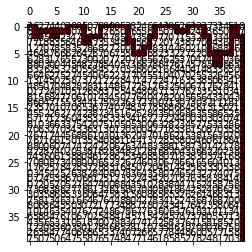

In [23]:
# path = [list(x) for x in prev_l]
# type(path)
fig = plt.figure()
ax = fig.add_subplot(111)

colored_path = np.zeros((HEIGHT,WIDTH), dtype=int)

for list in prev_l:
    r= list[0]
    c = list[1]
    colored_path[r,c] = 1
# print(colored_path)


min_val, max_val = 0, HEIGHT
for i in range(max_val):
    for j in range(max_val):
      c = ARRAY[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

cax = ax.matshow(colored_path, cmap = plt.cm.Reds)
plt.show()